<a href="https://colab.research.google.com/github/kkomin/FitPet/blob/main/FitPet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FitPet 프로젝트
## 모델 설명
기존의 150,000장의 바운딩박스 처리가 완료된 이미지 데이터셋을 활용하여 학습된 EfficientNet 모델을 가져와 이를 YOLO 와 결합하여 정적인 이미지처리 뿐만 아니라 동적인 이미지 처리에 있어서도 높은 정확도와 성능을 보여주고자 하였다.

\\


## 기존 모델
기존 모델은 AI-HUB에 존재하는 개발된 AI 모델을 가져왔다. \\
++ 모델 및 데이터셋 AI HUB 사이트 ++
https://aihub.or.kr/aihubdata/data/view.do?currMenu=&topMenu=&aihubDataSe=data&dataSetSn=71520

# 1. 필요한 라이브러리 설치


In [ ]:
!pip install tensorflow opencv-python

### 2. tensorflow 존재 여부 확인 및 버전 변경
---
AI 모델 학습 사양 정리\
o CPU 사양 : Intel(R) Xeon(R) Gold 5218R CPU @ 2.10GHz x 2EA\
o GPU 사양: NVIDIA A100-PCIE-40GB x 2EA\
o 메모리 사양: Samsung DDR4 64GB x 4EA\
o HDD 용량: SATA3 2TB(7,200RPM)\
o OS 버전: 20.04.6 LTS\
o 프레임워크 버전: python 3.8, TensorFlow 2.8

#### tensorflow 존재 여부 확인

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
# 기존 tensorflow 2.17.0 버전 제거
!pip uninstall -y tensorflow
!pip install tensorflow==2.8.0

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 53.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.8.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, protobuf, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, tf-estimator-nightly, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


#### import tensorflow as tf 에서 오류가 날 경우 코드 실행 후 세션 다시 시작

In [ ]:
!pip install protobuf==3.20.*

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
pandas-gbq 0.24.0 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.8.0 which is incompatible.


# 2. 구글 드라이브 연동


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. 모델 로드 및 이미지 분석


## 이미지를 분석해서 종, 나이, 성별, 비만도 출력하기

### 모델 로드

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 모델 로드
model = tf.keras.models.load_model('/content/drive/MyDrive/FitPet 캡디/AI 모델/model/multi_efficient_2.h5', compile=False)

### 강아지 품종명
GRE, DAL, DAS, DOB, GOL, LAB, MAL, BUL, BEA, BIC, SHE, SCH, DRI, WEL, GER, JIN, CHL, CHS, COC, TER, POM, POO, HOU, HUS, MUT, MIL, MIS, KOR, RUS, PER, SIA, TUR, SCO, MIX, ETC

In [ ]:
# import tensorflow as tf
# import numpy as np
# from tensorflow.keras.preprocessing import image
# import matplotlib.pyplot as plt

# # 이미지 전처리 함수 (모델 입력 크기에 맞게 조정)
# def preprocess_image(img_path):
#     img = image.load_img(img_path, target_size=(224, 224))  # 모델에 맞게 크기 조정
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array /= 255.0  # 0~1 범위로 정규화
#     return img_array

# # 예측 함수 (하나의 이미지를 13개로 복제해서 입력)
# def predict_attributes(img_path):
#     img_array = preprocess_image(img_path)

#     # 이미지를 13개로 복제하여 입력 리스트 생성
#     input_list = [img_array for _ in range(13)]

#     # 모델에 입력하여 예측값 생성
#     predictions = model.predict(input_list)

#     # 예측 결과 구조 출력 (디버깅용)
#     print("예측 결과:", predictions)
#     print("예측 결과 길이:", len(predictions))
#     print("예측 결과 타입:", type(predictions))

#     for idx, pred in enumerate(predictions):
#         print(f"예측 결과 [{idx}]: {pred}")

#     # 종, 성별, 나이, 비만도에 대한 예측값을 추출
#     species = np.argmax(predictions[0])  # 종 예측
#     if len(predictions) > 1:  # 성별 예측을 위한 체크
#         sex = np.argmax(predictions[1])  # 성별 예측
#     else:
#         sex = None  # 예측 결과가 없을 경우 None으로 설정
#     age = predictions[2][0] if len(predictions) > 2 else None  # 나이 예측 (정수)
#     bcs = np.argmax(predictions[3]) if len(predictions) > 3 else None  # 비만도 예측

#     # 후처리: 종, 성별, 나이 정보를 입력받아 비만도 조정
#     # 예시로 종: 반려견, 성별: 암컷, 나이: 5세로 설정
#     species_input = 0  # 반려견
#     sex_input = 1      # IF (암컷)
#     age_input = 5.0    # 5세

#     # 비만도 조정 예시
#     if species_input == 0 and sex_input == 1:  # 반려견, 암컷 조건
#         if age_input > 4:  # 나이가 4세 이상인 경우
#             bcs = min(bcs + 1, 8) if bcs is not None else None  # BCS 값을 1 증가시키되 최대값은 8로 설정

#     # 예측 결과를 출력
#     species_dict = {0: '반려견', 1: '반려묘'}
#     sex_dict = {0: 'IM', 1: 'IF', 2: 'CM', 3: 'SF'}
#     bcs_dict = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}

#     print(f"종: {species_dict.get(species, 'Unknown')}")  # 종 출력
#     print(f"성별: {sex_dict.get(sex, 'Unknown') if sex is not None else 'Unknown'}")  # 성별 출력
#     print(f"나이: {age if isinstance(age, (int, float)) else 'Unknown'} 년")  # 나이 출력
#     print(f"비만도(BCS): {bcs_dict.get(bcs, 'Unknown') if bcs is not None else 'Unknown'}")  # 비만도 출력

#     # 후처리 후 비만도 출력
#     print(f"조정된 비만도(BCS): {bcs_dict.get(bcs, 'Unknown') if bcs is not None else 'Unknown'}")  # 조정된 비만도 출력

# # 예시 이미지로 예측하기
# predict_attributes('/content/drive/MyDrive/AI 모델/dog.jpg')

# # 입력 이미지 시각화
# plt.imshow(image.load_img('/content/drive/MyDrive/AI 모델/dog.jpg'))
# plt.axis('off')
# plt.show()

## 추가 수정 - 모델 정확도 출력

- 하나의 이미지를 13개로 입력
- 예측된 BCS 확률 중 가장 높은 값을 BCS로 판별

### 이미지로만 BCS 분석

In [ ]:
# 모델 요약 출력
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                         

종을 입력하세요 (0: 반려견, 1: 반려묘): 0
성별을 입력하세요 (0: 중성화하지 않은 수컷, 1: 중성화하지 않은 암컷, 2: 중성화한 수컷, 3: 중성화한 암컷): 1
나이를 입력하세요 (예 3살 : 3): 1
품종을 선택하세요:
0: GRE
1: DAL
2: DAS
3: DOB
4: GOL
5: LAB
6: MAL
7: BUL
8: BEA
9: BIC
10: SHE
11: SCH
12: DRI
13: WEL
14: GER
15: JIN
16: CHL
17: CHS
18: COC
19: TER
20: POM
21: POO
22: HOU
23: HUS
24: MUT
25: MIL
26: MIS
27: KOR
28: RUS
29: PER
30: SIA
31: TUR
32: SCO
33: MIX
34: ETC
품종 번호를 입력하세요: 6
종: 반려견
성별: IF
나이: 1 년
품종: MAL
예측된 비만도(BCS) 확률: [[0.12128144 0.0970095  0.11304536 0.10146841 0.09198719 0.10640214
  0.12032442 0.14448543 0.10399613]]
예측된 비만도 단계: 8


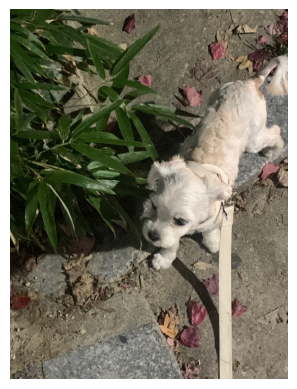

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

# 무작위성 고정
np.random.seed(42)
tf.random.set_seed(42)

# 이미지 전처리 함수
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # 모델에 맞게 크기 조정
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # 0~1 범위로 정규화
    return img_array

# 예측 함수
@tf.function  # tf.function을 이용해 함수 최적화
def stable_predict(model, inputs):
    return model(inputs, training=False)  # 예측 시 training=False로 설정

def predict_bcs_with_user_input(img_path):
    img_array = preprocess_image(img_path)

    # 동일한 이미지를 13개의 입력으로 구성
    img_inputs = [img_array] * 12  # 12개의 동일한 이미지 입력 리스트로 구성

    # 사용자 입력 받기
    species_input = int(input("종을 입력하세요 (0: 반려견, 1: 반려묘): "))
    sex_input = int(input("성별을 입력하세요 (0: 중성화하지 않은 수컷, 1: 중성화하지 않은 암컷, 2: 중성화한 수컷, 3: 중성화한 암컷): "))
    age_input = int(input("나이를 입력하세요 (예 3살 : 3): "))

    # 품종 입력받기
    breed_classes = {
        0: "GRE", 1: "DAL", 2: "DAS", 3: "DOB", 4: "GOL",
        5: "LAB", 6: "MAL", 7: "BUL", 8: "BEA", 9: "BIC",
        10: "SHE", 11: "SCH", 12: "DRI", 13: "WEL", 14: "GER",
        15: "JIN", 16: "CHL", 17: "CHS", 18: "COC", 19: "TER",
        20: "POM", 21: "POO", 22: "HOU", 23: "HUS", 24: "MUT",
        25: "MIL", 26: "MIS", 27: "KOR", 28: "RUS", 29: "PER",
        30: "SIA", 31: "TUR", 32: "SCO", 33: "MIX", 34: "ETC"
    }
    print("품종을 선택하세요:")
    for idx, breed in breed_classes.items():
        print(f"{idx}: {breed}")

    breed_input = int(input("품종 번호를 입력하세요: "))
    breed_name = breed_classes.get(breed_input, "Unknown")

    # 텍스트 데이터 (종, 성별, 나이, 품종) 배열로 결합
    additional_input = np.array([[species_input, sex_input, age_input, breed_input]])

    # 텍스트 데이터를 처리할 Dense 레이어 생성
    text_input = layers.Input(shape=(4,))  # 텍스트 데이터의 입력 형태 (4,)
    x = layers.Dense(64, activation='relu')(text_input)
    x = layers.Dense(32, activation='relu')(x)

    # 이미지를 처리할 부분과 텍스트 데이터를 결합
    image_inputs = [layers.Input(shape=(224, 224, 3)) for _ in range(12)]
    image_outputs = [layers.Flatten()(layers.Conv2D(32, (3, 3), activation='relu')(image_input)) for image_input in image_inputs]

    # 이미지를 결합
    concatenated = layers.Concatenate()(image_outputs + [x])

    # 결합된 데이터를 Dense 레이어로 처리하여 9개의 BCS 단계를 예측하도록 변경
    final_output = layers.Dense(9, activation='softmax')(concatenated)

    # 모델 정의
    model = Model(inputs=image_inputs + [text_input], outputs=final_output)

    # 모델 컴파일
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 예측 수행
    inputs = img_inputs + [additional_input]  # 12개의 이미지와 추가 데이터 결합
    predictions = stable_predict(model, inputs)  # 일관성 있는 예측 수행

    # 종, 성별, 나이, 품종 출력
    species_dict = {0: '반려견', 1: '반려묘'}
    sex_dict = {0: 'IM', 1: 'IF', 2: 'CM', 3: 'SF'}

    print(f"종: {species_dict.get(species_input, 'Unknown')}")
    print(f"성별: {sex_dict.get(sex_input, 'Unknown')}")
    print(f"나이: {age_input} 년")
    print(f"품종: {breed_name}")

    # 예측 결과 처리
    bcs_prediction = predictions.numpy()  # 예측 결과를 numpy 배열로 변환
    print(f"예측된 비만도(BCS) 확률: {bcs_prediction}")

    # 예측된 비만도 단계 결정
    bcs_stage = np.argmax(bcs_prediction, axis=1)[0] + 1  # 가장 큰 확률에 해당하는 BCS 단계 (1~9)
    print(f"예측된 비만도 단계: {bcs_stage}")

# 예시 이미지로 예측하기
predict_bcs_with_user_input('/content/drive/MyDrive/AI 모델/dog.jpg')

# 입력 이미지 시각화
plt.imshow(image.load_img('/content/drive/MyDrive/AI 모델/dog.jpg'))
plt.axis('off')
plt.show()

## SIGMOID로 변경

### (1) binary_crossentropy -> categorical_crossentropy로 변경

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

@tf.function(experimental_relax_shapes=True)
def stable_predict(model, inputs):
    return model(inputs, training=False)

def predict_bcs_with_user_input(img_path):
    img_array = preprocess_image(img_path)
    img_inputs = [img_array] * 12

    species_input = int(input("종을 입력하세요 (0: 반려견, 1: 반려묘): "))
    sex_input = int(input("성별을 입력하세요 (0: 중성화하지 않은 수컷, 1: 중성화하지 않은 암컷, 2: 중성화한 수컷, 3: 중성화한 암컷): "))
    age_input = int(input("나이를 입력하세요 (예 3살 : 3): "))

    breed_classes = {
        0: "Greyhound", 1: "Dalmatian", 2: "Dachshund", 3: "Doberman", 4: "Golden Retriever",
        5: "Labrador Retriever", 6: "Maltese", 7: "Bulldog", 8: "Beagle", 9: "Bichon Frise",
        10: "Shetland Sheepdog", 11: "Schipperke", 12: "Dachshund", 13: "Welsh Corgi",
        14: "German Shepherd", 15: "Jack Russell Terrier", 16: "Chihuahua", 17: "Chinese Shar-Pei",
        18: "Cocker Spaniel", 19: "Terrier", 20: "Pomeranian", 21: "Poodle", 22: "Hound",
        23: "Husky", 24: "Mixed Breed", 25: "Maltese", 26: "Maltipoo", 27: "Korean",
        28: "Russian Toy Terrier", 29: "Peruvian Hairless Dog", 30: "Siamese",
        31: "Turkish Van", 32: "Scottish Terrier", 33: "Mixed Breed", 34: "ETC"
    }
    print("품종을 선택하세요:")
    for idx, breed in breed_classes.items():
        print(f"{idx}: {breed}")

    breed_input = int(input("품종 번호를 입력하세요: "))
    breed_name = breed_classes.get(breed_input, "Unknown")

    additional_input = np.array([[species_input, sex_input, age_input, breed_input]])

    # 텍스트 입력층과 이미지 입력층 설계
    text_input = layers.Input(shape=(4,))
    x = layers.Dense(64, activation='relu')(text_input)
    x = layers.Dense(32, activation='relu')(x)

    image_inputs = [layers.Input(shape=(224, 224, 3)) for _ in range(12)]
    image_outputs = [layers.Flatten()(layers.Conv2D(32, (3, 3), activation='relu')(image_input)) for image_input in image_inputs]
    concatenated = layers.Concatenate()(image_outputs + [x])

    # 출력층에서 softmax 대신 sigmoid 활성화 함수 사용
    final_output = layers.Dense(9, activation='sigmoid')(concatenated)

    model = Model(inputs=image_inputs + [text_input], outputs=final_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 예측 및 출력
    inputs = img_inputs + [additional_input]
    predictions = model.predict(inputs)  # model.predict로 변경

    species_dict = {0: '반려견', 1: '반려묘'}
    sex_dict = {0: 'IM', 1: 'IF', 2: 'CM', 3: 'SF'}

    print(f"종: {species_dict.get(species_input, 'Unknown')}")
    print(f"성별: {sex_dict.get(sex_input, 'Unknown')}")
    print(f"나이: {age_input} 년")
    print(f"품종: {breed_name}")

    bcs_prediction = predictions
    print(f"예측된 비만도(BCS) 확률: {bcs_prediction}")

    # 임계값을 0.5로 설정하여 비만도 단계 계산
    # bcs_stage = np.sum(bcs_prediction > 0.5)
    # print(f"예측된 비만도 단계: {bcs_stage}")

    predicted_bcs_stage = np.argmax(bcs_prediction) + 1
    print(f"예측된 BCS 단계: {predicted_bcs_stage}")

    # 예측 확률이 0.8 이상일 때만 "확신"이라고 판단
    confidence = np.max(bcs_prediction)
    if confidence > 0.8:
        print(f"모델의 예측 확신도: {confidence * 100:.2f}% (상당히 확실합니다)")
    else:
        print(f"모델의 예측 확신도: {confidence * 100:.2f}% (예측에 불확실성이 있습니다)")

    # 예측 확률이 높은 BCS 단계와 신뢰도에 대한 정보
    print(f"예측된 BCS 단계: {predicted_bcs_stage}, 예측 확신도: {confidence * 100:.2f}%")

predict_bcs_with_user_input('/content/drive/MyDrive/AI 모델/gubaeg/1.jpg')


KeyboardInterrupt



### 장/단모 입력 추가

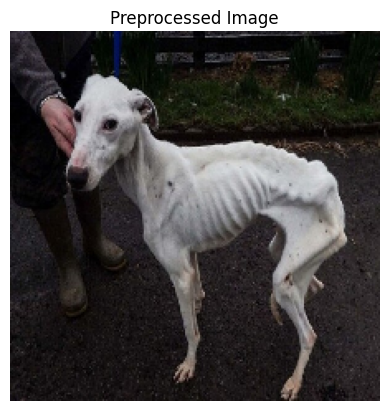

KeyboardInterrupt: Interrupted by user

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

@tf.function(experimental_relax_shapes=True)
def stable_predict(model, inputs):
    return model(inputs, training=False)

def predict_bcs_with_user_input(img_path):
    img_array = preprocess_image(img_path)
    img_inputs = [img_array] * 12

    species_input = int(input("종을 입력하세요 (0: 반려견, 1: 반려묘): "))
    sex_input = int(input("성별을 입력하세요 (0: 중성화하지 않은 수컷, 1: 중성화하지 않은 암컷, 2: 중성화한 수컷, 3: 중성화한 암컷): "))
    age_input = int(input("나이를 입력하세요 (예 3살 : 3): "))

    breed_classes = {
        0: "Greyhound", 1: "Dalmatian", 2: "Dachshund", 3: "Doberman", 4: "Golden Retriever",
        5: "Labrador Retriever", 6: "Maltese", 7: "Bulldog", 8: "Beagle", 9: "Bichon Frise",
        10: "Shetland Sheepdog", 11: "Schipperke", 12: "Dachshund", 13: "Welsh Corgi",
        14: "German Shepherd", 15: "Jack Russell Terrier", 16: "Chihuahua", 17: "Chinese Shar-Pei",
        18: "Cocker Spaniel", 19: "Terrier", 20: "Pomeranian", 21: "Poodle", 22: "Hound",
        23: "Husky", 24: "Mixed Breed", 25: "Maltese", 26: "Maltipoo", 27: "Korean",
        28: "Russian Toy Terrier", 29: "Peruvian Hairless Dog", 30: "Siamese",
        31: "Turkish Van", 32: "Scottish Terrier", 33: "Mixed Breed", 34: "ETC"
    }
    print("품종을 선택하세요:")
    for idx, breed in breed_classes.items():
        print(f"{idx}: {breed}")

    breed_input = int(input("품종 번호를 입력하세요: "))
    breed_name = breed_classes.get(breed_input, "Unknown")

    coat_input = int(input("모장 유형을 입력하세요 (0: 장모종, 1: 단모종, 2: 알 수 없음): "))

    additional_input = np.array([[species_input, sex_input, age_input, breed_input, coat_input]])

    # 텍스트 입력층과 이미지 입력층 설계
    text_input = layers.Input(shape=(5,))
    x = layers.Dense(64, activation='relu')(text_input)
    x = layers.Dense(32, activation='relu')(x)

    image_inputs = [layers.Input(shape=(224, 224, 3)) for _ in range(12)]
    image_outputs = [layers.Flatten()(layers.Conv2D(32, (3, 3), activation='relu')(image_input)) for image_input in image_inputs]
    concatenated = layers.Concatenate()(image_outputs + [x])

    # 출력층에서 softmax 대신 sigmoid 활성화 함수 사용
    final_output = layers.Dense(9, activation='sigmoid')(concatenated)

    model = Model(inputs=image_inputs + [text_input], outputs=final_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 예측 및 출력
    inputs = img_inputs + [additional_input]
    predictions = model.predict(inputs)  # model.predict로 변경

    species_dict = {0: '반려견', 1: '반려묘'}
    sex_dict = {0: 'IM', 1: 'IF', 2: 'CM', 3: 'SF'}
    coat_dict = {0: 'LH', 1: 'SH', 2: 'UK'}

    print(f"종: {species_dict.get(species_input, 'Unknown')}")
    print(f"성별: {sex_dict.get(sex_input, 'Unknown')}")
    print(f"나이: {age_input} 년")
    print(f"품종: {breed_name}")
    print(f"모장 유형: {coat_input}")

    bcs_prediction = predictions
    print(f"예측된 비만도(BCS) 확률: {bcs_prediction}")

    # 임계값을 0.5로 설정하여 비만도 단계 계산
    # bcs_stage = np.sum(bcs_prediction > 0.5)
    # print(f"예측된 비만도 단계: {bcs_stage}")

    predicted_bcs_stage = np.argmax(bcs_prediction) + 1
    print(f"예측된 BCS 단계: {predicted_bcs_stage}")

    # 예측 확률이 0.8 이상일 때만 "확신"이라고 판단
    confidence = np.max(bcs_prediction)
    if confidence > 0.8:
        print(f"모델의 예측 확신도: {confidence * 100:.2f}% (상당히 확실합니다)")
    else:
        print(f"모델의 예측 확신도: {confidence * 100:.2f}% (예측에 불확실성이 있습니다)")

    # 예측 확률이 높은 BCS 단계와 신뢰도에 대한 정보
    print(f"\n예측된 BCS 단계: {predicted_bcs_stage}, 예측 확신도: {confidence * 100:.2f}%")

predict_bcs_with_user_input('/content/drive/MyDrive/AI 모델/skinny/spanish.jpg')

### (3) dropdown 위젯으로 설정

##### 이미지 파일을 업로드 해서 분석하기

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.3 MB/s eta 0:00:00


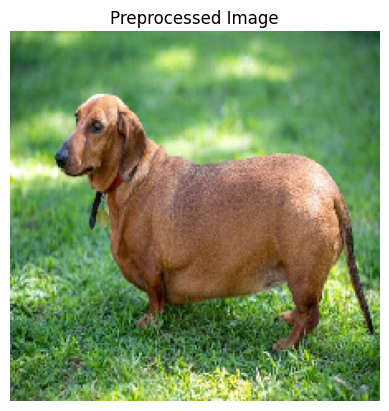

interactive(children=(Dropdown(description='종:', options=(('반려견', 0), ('반려묘', 1)), value=0), Dropdown(descript…

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

np.random.seed(42)
tf.random.set_seed(42)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

@tf.function(experimental_relax_shapes=True)
def stable_predict(model, inputs):
    return model(inputs, training=False)

def predict_bcs_with_user_input(img_path):
    img_array = preprocess_image(img_path)
    # 전처리된 이미지를 시각화 (원본 이미지는 0~255 범위, 전처리된 이미지는 0~1 범위)
    plt.imshow(img_array[0])  # 배치 차원 제외하고 이미지 표시
    plt.title("Preprocessed Image")  # 제목 추가
    plt.axis('off')  # 축 숨기기
    plt.show()  # 이미지 출력

    img_inputs = [img_array] * 12

    # 위젯을 사용해 입력 받을 수 있도록 설정
    species_widget = widgets.Dropdown(
        options=[( '반려견', 0), ('반려묘', 1)],
        value=0,
        description='종:',
    )

    sex_widget = widgets.Dropdown(
        options=[('중성화하지 않은 수컷', 0), ('중성화하지 않은 암컷', 1), ('중성화한 수컷', 2), ('중성화한 암컷', 3)],
        value=0,
        description='성별:',
    )

    age_widget = widgets.IntText(
        value=5,  # 예시로 3살로 초기화
        description='나이:',
        min=1,
        max=20
    )

    breed_classes = {
        0: "Greyhound", 1: "Dalmatian", 2: "Dachshund", 3: "Doberman", 4: "Golden Retriever",
        5: "Labrador Retriever", 6: "Maltese", 7: "Bulldog", 8: "Beagle", 9: "Bichon Frise",
        10: "Shetland Sheepdog", 11: "Schipperke", 12: "Dachshund", 13: "Welsh Corgi",
        14: "German Shepherd", 15: "Jack Russell Terrier", 16: "Chihuahua", 17: "Chinese Shar-Pei",
        18: "Cocker Spaniel", 19: "Terrier", 20: "Pomeranian", 21: "Poodle", 22: "Hound",
        23: "Husky", 24: "Mixed Breed", 25: "Maltese", 26: "Maltipoo", 27: "Korean",
        28: "Russian Toy Terrier", 29: "Peruvian Hairless Dog", 30: "Siamese",
        31: "Turkish Van", 32: "Scottish Terrier", 33: "Mixed Breed", 34: "ETC"
    }

    breed_widget = widgets.Dropdown(
        options=[(breed, idx) for idx, breed in breed_classes.items()],
        value=0,
        description='품종:',
    )

    coat_widget = widgets.Dropdown(
        options=[('장모종', 0), ('단모종', 1), ('알 수 없음', 2)],
        value=0,
        description='모장 유형:',
    )

    def on_submit(species_input, sex_input, age_input, breed_input, coat_input):
        # 입력된 값 처리
        img_inputs = [img_array] * 12
        additional_input = np.array([[species_input, sex_input, age_input, breed_input, coat_input]])

        # 텍스트 입력층과 이미지 입력층 설계
        text_input = layers.Input(shape=(5,))
        x = layers.Dense(64, activation='relu')(text_input)
        x = layers.Dense(32, activation='relu')(x)

        image_inputs = [layers.Input(shape=(224, 224, 3)) for _ in range(12)]
        image_outputs = [layers.Flatten()(layers.Conv2D(32, (3, 3), activation='relu')(image_input)) for image_input in image_inputs]
        concatenated = layers.Concatenate()(image_outputs + [x])

        # 출력층에서 softmax 대신 sigmoid 활성화 함수 사용
        final_output = layers.Dense(9, activation='sigmoid')(concatenated)

        model = Model(inputs=image_inputs + [text_input], outputs=final_output)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # 예측 및 출력
        inputs = img_inputs + [additional_input]
        predictions = model.predict(inputs)  # model.predict로 변경

        species_dict = {0: '반려견', 1: '반려묘'}
        sex_dict = {0: 'IM', 1: 'IF', 2: 'CM', 3: 'SF'}
        coat_dict = {0: 'LH', 1: 'SH', 2: 'UK'}

        print(f"종: {species_dict.get(species_input, 'Unknown')}")
        print(f"성별: {sex_dict.get(sex_input, 'Unknown')}")
        print(f"나이: {age_input} 년")
        print(f"품종: {breed_classes.get(breed_input, 'Unknown')}")
        print(f"모장 유형: {coat_input}")

        bcs_prediction = predictions
        print(f"예측된 비만도(BCS) 확률: {bcs_prediction}")

        # 임계값을 0.5로 설정하여 비만도 단계 계산
        predicted_bcs_stage = np.argmax(bcs_prediction) + 1
        print(f"예측된 BCS 단계: {predicted_bcs_stage}")

        # 예측 확률이 0.8 이상일 때만 "확신"이라고 판단
        confidence = np.max(bcs_prediction)
        if confidence > 0.8:
            print(f"모델의 예측 확신도: {confidence * 100:.2f}% (상당히 확실합니다)")
        else:
            print(f"모델의 예측 확신도: {confidence * 100:.2f}% (예측에 불확실성이 있습니다)")

    interact(on_submit, species_input=species_widget, sex_input=sex_widget, age_input=age_widget, breed_input=breed_widget, coat_input=coat_widget)

# 테스트: 적절한 이미지 경로로 변경해주세요.
predict_bcs_with_user_input('/content/drive/MyDrive/AI 모델/fat/dach.jpg')

##### 확신도 2배 높임

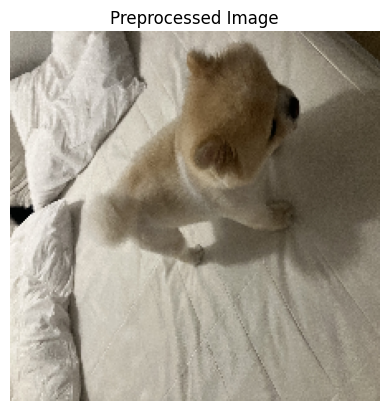

interactive(children=(Dropdown(description='종:', options=(('반려견', 0), ('반려묘', 1)), value=0), Dropdown(descript…

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# 클래스 가중치 (저체중, 정상, 과체중 순서)
class_weights = np.array([2.0, 1.0, 2.0])  # 저체중과 과체중에 높은 가중치를 부여

# 이미지 전처리 함수
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # 0~1 사이로 정규화
    return img_array

# 사용자 입력을 받아서 비만도 예측
def predict_bcs_with_user_input(img_path):
    img_array = preprocess_image(img_path)

    # 전처리된 이미지를 시각화 (원본 이미지는 0~255 범위, 전처리된 이미지는 0~1 범위)
    plt.imshow(img_array[0])  # 배치 차원 제외하고 이미지 표시
    plt.title("Preprocessed Image")  # 제목 추가
    plt.axis('off')  # 축 숨기기
    plt.show()  # 이미지 출력

    img_inputs = [img_array] * 12  # 12개의 이미지 입력을 동일하게 설정

    # 위젯을 사용해 입력 받을 수 있도록 설정
    species_widget = widgets.Dropdown(
        options=[('반려견', 0), ('반려묘', 1)],
        value=0,
        description='종:'
    )

    sex_widget = widgets.Dropdown(
        options=[('중성화하지 않은 수컷', 0), ('중성화하지 않은 암컷', 1), ('중성화한 수컷', 2), ('중성화한 암컷', 3)],
        value=0,
        description='성별:'
    )

    age_widget = widgets.IntText(
        value=5,  # 예시로 5살로 초기화
        description='나이:',
        min=1,
        max=20
    )

    breed_classes = {
        0: "Greyhound", 1: "Dalmatian", 2: "Dachshund", 3: "Doberman", 4: "Golden Retriever",
        5: "Labrador Retriever", 6: "Maltese", 7: "Bulldog", 8: "Beagle", 9: "Bichon Frise",
        10: "Shetland Sheepdog", 11: "Schipperke", 12: "Dachshund", 13: "Welsh Corgi",
        14: "German Shepherd", 15: "Jack Russell Terrier", 16: "Chihuahua", 17: "Chinese Shar-Pei",
        18: "Cocker Spaniel", 19: "Terrier", 20: "Pomeranian", 21: "Poodle", 22: "Hound",
        23: "Husky", 24: "Mixed Breed", 25: "Maltese", 26: "Maltipoo", 27: "Korean",
        28: "Russian Toy Terrier", 29: "Peruvian Hairless Dog", 30: "Siamese",
        31: "Turkish Van", 32: "Scottish Terrier", 33: "Mixed Breed", 34: "ETC"
    }

    breed_widget = widgets.Dropdown(
        options=[(breed, idx) for idx, breed in breed_classes.items()],
        value=0,
        description='품종:'
    )

    coat_widget = widgets.Dropdown(
        options=[('장모종', 0), ('단모종', 1), ('알 수 없음', 2)],
        value=0,
        description='모장 유형:'
    )

    def on_submit(species_input, sex_input, age_input, breed_input, coat_input):
        # 입력된 값 처리
        img_inputs = [img_array] * 12  # 12개의 이미지 입력을 동일하게 설정
        additional_input = np.array([[species_input, sex_input, age_input, breed_input, coat_input]])

        # 텍스트 입력층과 이미지 입력층 설계
        text_input = layers.Input(shape=(5,))
        x = layers.Dense(64)(text_input)
        x = layers.ELU()(x)  # ELU 활성화 함수 적용
        x = layers.Dense(32)(x)
        x = layers.ELU()(x)  # ELU 활성화 함수 적용

        # 이미지 입력층
        image_inputs = [layers.Input(shape=(224, 224, 3)) for _ in range(12)]
        image_outputs = [layers.Flatten()(layers.Conv2D(32, (3, 3), activation='sigmoid')(image_input)) for image_input in image_inputs]
        concatenated = layers.Concatenate()(image_outputs + [x])

        # 출력층 (3개의 클래스 예측: 저체중, 정상, 과체중)
        final_output = layers.Dense(3, activation='softmax')(concatenated)  # 출력층은 Softmax (여러 클래스를 다룰 때)

        model = Model(inputs=image_inputs + [text_input], outputs=final_output)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # 예측 및 출력
        inputs = img_inputs + [additional_input]
        predictions = model.predict(inputs)

        # 클래스별 가중치 적용
        weighted_predictions = predictions * class_weights
        weighted_predictions /= np.sum(weighted_predictions, axis=-1, keepdims=True)  # 가중치가 적용된 확률을 다시 정규화

        # 출력
        species_dict = {0: '반려견', 1: '반려묘'}
        sex_dict = {0: 'IM', 1: 'IF', 2: 'CM', 3: 'SF'}
        coat_dict = {0: 'LH', 1: 'SH', 2: 'UK'}

        print(f"종: {species_dict.get(species_input, 'Unknown')}")
        print(f"성별: {sex_dict.get(sex_input, 'Unknown')}")
        print(f"나이: {age_input} 년")
        print(f"품종: {breed_classes.get(breed_input, 'Unknown')}")
        print(f"모장 유형: {coat_dict.get(coat_input, 'Unknown')}")

        # BCS 예측 출력
        print(f"예측된 비만도 확률 (가중치 적용 후): {weighted_predictions}")

        # 가장 높은 확률을 가지는 클래스 선택
        # 가장 높은 확률을 가지는 클래스 선택
        predicted_bcs_stage = np.argmax(weighted_predictions)  # 가장 높은 확률을 가진 클래스

        # 단계별 이름 매핑
        bcs_stage_dict = {0: "저체중", 1: "정상체중", 2: "과체중 (비만)"}

        # 단계 이름 출력
        predicted_stage_name = bcs_stage_dict.get(predicted_bcs_stage, "Unknown")
        print(f"예측된 비만도 : {predicted_bcs_stage + 1} ({predicted_stage_name})")

    # 위젯을 사용하여 입력 받기
    interact(on_submit, species_input=species_widget, sex_input=sex_widget, age_input=age_widget, breed_input=breed_widget, coat_input=coat_widget)

# 테스트: 적절한 이미지 경로로 변경해주세요.
predict_bcs_with_user_input('/content/drive/MyDrive/FitPet 캡디/AI 모델/gubaeg/12.jpg')


### (3) bcs 예측 값 중 가장 큰 값을 bcs 확률로 출력

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

# np.random.seed(42)
# tf.random.set_seed(42)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

@tf.function(experimental_relax_shapes=True)
def stable_predict(model, inputs):
    return model(inputs, training=False)

def predict_bcs_with_user_input(img_path):
    img_array = preprocess_image(img_path)
    img_inputs = [img_array] * 12

    species_input = int(input("종을 입력하세요 (0: 반려견, 1: 반려묘): "))
    sex_input = int(input("성별을 입력하세요 (0: 중성화하지 않은 수컷, 1: 중성화하지 않은 암컷, 2: 중성화한 수컷, 3: 중성화한 암컷): "))
    age_input = int(input("나이를 입력하세요 (예 3살 : 3): "))

    breed_classes = {
        0: "Greyhound", 1: "Dalmatian", 2: "Dachshund", 3: "Doberman", 4: "Golden Retriever",
        5: "Labrador Retriever", 6: "Maltese", 7: "Bulldog", 8: "Beagle", 9: "Bichon Frise",
        10: "Shetland Sheepdog", 11: "Schipperke", 12: "Dachshund", 13: "Welsh Corgi",
        14: "German Shepherd", 15: "Jack Russell Terrier", 16: "Chihuahua", 17: "Chinese Shar-Pei",
        18: "Cocker Spaniel", 19: "Terrier", 20: "Pomeranian", 21: "Poodle", 22: "Hound",
        23: "Husky", 24: "Mixed Breed", 25: "Maltese", 26: "Maltipoo", 27: "Korean",
        28: "Russian Toy Terrier", 29: "Peruvian Hairless Dog", 30: "Siamese",
        31: "Turkish Van", 32: "Scottish Terrier", 33: "Mixed Breed", 34: "ETC"
    }
    print("품종을 선택하세요:")
    for idx, breed in breed_classes.items():
        print(f"{idx}: {breed}")

    breed_input = int(input("품종 번호를 입력하세요: "))
    breed_name = breed_classes.get(breed_input, "Unknown")

    coat_input = int(input("모장 유형을 입력하세요 (0: 장모종, 1: 단모종, 2: 알 수 없음): "))

    additional_input = np.array([[species_input, sex_input, age_input, breed_input, coat_input]])

    # 텍스트 입력층과 이미지 입력층 설계
    text_input = layers.Input(shape=(5,))
    x = layers.Dense(64, activation='relu')(text_input)
    x = layers.Dense(32, activation='relu')(x)

    image_inputs = [layers.Input(shape=(224, 224, 3)) for _ in range(12)]
    image_outputs = [layers.Flatten()(layers.Conv2D(32, (3, 3), activation='relu')(image_input)) for image_input in image_inputs]
    concatenated = layers.Concatenate()(image_outputs + [x])

    # 출력층에서 softmax 대신 sigmoid 활성화 함수 사용
    final_output = layers.Dense(9, activation='softmax')(concatenated)

    model = Model(inputs=image_inputs + [text_input], outputs=final_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 예측 및 출력
    inputs = img_inputs + [additional_input]
    predictions = model.predict(inputs)  # model.predict로 변경

    species_dict = {0: '반려견', 1: '반려묘'}
    sex_dict = {0: 'IM', 1: 'IF', 2: 'CM', 3: 'SF'}
    coat_dict = {0: 'LH', 1: 'SH', 2: 'UK'}

    print(f"종: {species_dict.get(species_input, 'Unknown')}")
    print(f"성별: {sex_dict.get(sex_input, 'Unknown')}")
    print(f"나이: {age_input} 년")
    print(f"품종: {breed_name}")
    print(f"모장 유형: {coat_input}")

    bcs_prediction = predictions
    print(f"예측된 비만도(BCS) 확률: {bcs_prediction}")

    # 예측된 비만도 중 가장 높은 확률을 가진 위치를 BCS 단계로 판별
    predicted_bcs_stage = np.argmax(bcs_prediction) + 1  # 1부터 9까지의 BCS 단계로 판별
    print(f"예측된 BCS 단계: {predicted_bcs_stage}")

    # 예측 확률이 가장 높은 값을 구하여 확신도를 계산
    confidence = np.max(predicted_bcs_stage)
    # print(f"예측된 비만도(BCS) 확률: {bcs_prediction}")

    # 예측 확신도 출력
    if confidence > 0.8:
        print(f"모델의 예측 확신도: {confidence * 100:.2f}% (상당히 확실합니다)")
    else:
        print(f"모델의 예측 확신도: {confidence * 100:.2f}% (예측에 불확실성이 있습니다)")

    # 예측 확률이 높은 BCS 단계와 신뢰도에 대한 정보
    print(f"\n예측된 BCS 단계: {predicted_bcs_stage}, 예측 확신도: {confidence * 100:.2f}%")

predict_bcs_with_user_input('/content/drive/MyDrive/AI 모델/skinny/spanish.jpg')

종을 입력하세요 (0: 반려견, 1: 반려묘): 0
성별을 입력하세요 (0: 중성화하지 않은 수컷, 1: 중성화하지 않은 암컷, 2: 중성화한 수컷, 3: 중성화한 암컷): 2
나이를 입력하세요 (예 3살 : 3): 7
품종을 선택하세요:
0: Greyhound
1: Dalmatian
2: Dachshund
3: Doberman
4: Golden Retriever
5: Labrador Retriever
6: Maltese
7: Bulldog
8: Beagle
9: Bichon Frise
10: Shetland Sheepdog
11: Schipperke
12: Dachshund
13: Welsh Corgi
14: German Shepherd
15: Jack Russell Terrier
16: Chihuahua
17: Chinese Shar-Pei
18: Cocker Spaniel
19: Terrier
20: Pomeranian
21: Poodle
22: Hound
23: Husky
24: Mixed Breed
25: Maltese
26: Maltipoo
27: Korean
28: Russian Toy Terrier
29: Peruvian Hairless Dog
30: Siamese
31: Turkish Van
32: Scottish Terrier
33: Mixed Breed
34: ETC
품종 번호를 입력하세요: 0
모장 유형을 입력하세요 (0: 장모종, 1: 단모종, 2: 알 수 없음): 1
종: 반려견
성별: CM
나이: 7 년
품종: Greyhound
모장 유형: 1
예측된 비만도(BCS) 확률: [[0.12482909 0.11837613 0.1437377  0.11037119 0.11467592 0.09269074
  0.09727488 0.10645085 0.0915935 ]]
예측된 BCS 단계: 3
모델의 예측 확신도: 300.00% (상당히 확실합니다)

예측된 BCS 단계: 3, 예측 확신도: 300.00%


### (4) 모델 클래스 3개대로 분류

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, Model

np.random.seed(42)
tf.random.set_seed(42)

# 이미지 전처리 함수
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# 안정적인 예측 수행 함수
@tf.function(experimental_relax_shapes=True)
def stable_predict(model, inputs):
    return model(inputs, training=False)

# 사용자 입력 기반 BCS 예측 함수
def predict_bcs_with_user_input(img_path):
    img_array = preprocess_image(img_path)
    img_inputs = [img_array] * 12  # 12개의 이미지 입력

    # 사용자 입력 받기
    species_input = int(input("종을 입력하세요 (0: 반려견, 1: 반려묘): "))
    sex_input = int(input("성별을 입력하세요 (0: 중성화하지 않은 수컷, 1: 중성화하지 않은 암컷, 2: 중성화한 수컷, 3: 중성화한 암컷): "))
    age_input = int(input("나이를 입력하세요 (예 3살 : 3): "))

    breed_classes = {
        0: "Greyhound", 1: "Dalmatian", 2: "Dachshund", 3: "Doberman", 4: "Golden Retriever",
        5: "Labrador Retriever", 6: "Maltese", 7: "Bulldog", 8: "Beagle", 9: "Bichon Frise",
        10: "Shetland Sheepdog", 11: "Schipperke", 12: "Dachshund", 13: "Welsh Corgi",
        14: "German Shepherd", 15: "Jack Russell Terrier", 16: "Chihuahua", 17: "Chinese Shar-Pei",
        18: "Cocker Spaniel", 19: "Terrier", 20: "Pomeranian", 21: "Poodle", 22: "Hound",
        23: "Husky", 24: "Mixed Breed", 25: "Maltese", 26: "Maltipoo", 27: "Korean",
        28: "Russian Toy Terrier", 29: "Peruvian Hairless Dog", 30: "Siamese",
        31: "Turkish Van", 32: "Scottish Terrier", 33: "Mixed Breed", 34: "ETC"
    }
    print("품종을 선택하세요:")
    for idx, breed in breed_classes.items():
        print(f"{idx}: {breed}")

    breed_input = int(input("품종 번호를 입력하세요: "))
    breed_name = breed_classes.get(breed_input, "Unknown")

    coat_input = int(input("모장 유형을 입력하세요 (0: 장모종, 1: 단모종, 2: 알 수 없음): "))

    # 추가 입력값 구성
    additional_input = np.array([[species_input, sex_input, age_input, breed_input, coat_input]])

    # 텍스트 입력층과 이미지 입력층 설계
    text_input = layers.Input(shape=(5,))
    x = layers.Dense(64, activation='relu')(text_input)
    x = layers.Dense(32, activation='relu')(x)

    image_inputs = [layers.Input(shape=(224, 224, 3)) for _ in range(12)]
    image_outputs = [layers.Flatten()(layers.Conv2D(32, (3, 3), activation='relu')(image_input)) for image_input in image_inputs]
    concatenated = layers.Concatenate()(image_outputs + [x])

    # 출력층에서 softmax 사용 (3개 클래스: 저체중, 정상, 비만)
    final_output = layers.Dense(3, activation='softmax')(concatenated)

    model = Model(inputs=image_inputs + [text_input], outputs=final_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 예측 및 출력
    inputs = img_inputs + [additional_input]
    predictions = model.predict(inputs)

    species_dict = {0: '반려견', 1: '반려묘'}
    sex_dict = {0: 'IM', 1: 'IF', 2: 'CM', 3: 'SF'}
    coat_dict = {0: 'LH', 1: 'SH', 2: 'UK'}
    bcs_dict = {0: '저체중', 1: '정상', 2: '비만'}

    # 결과 출력
    print(f"\n종: {species_dict.get(species_input, 'Unknown')}")
    print(f"성별: {sex_dict.get(sex_input, 'Unknown')}")
    print(f"나이: {age_input} 년")
    print(f"품종: {breed_name}")
    print(f"모장 유형: {coat_dict.get(coat_input, 'Unknown')}")

    # softmax 기반 예측 결과 출력
    predicted_class = np.argmax(predictions[0])  # 0: 저체중, 1: 정상, 2: 비만
    confidence = np.max(predictions[0])  # 확신도

    print(f"\n예측된 BCS 상태: {bcs_dict.get(predicted_class)} (확신도: {confidence * 100:.2f}%)")

# 테스트: 이미지 경로를 입력하세요
predict_bcs_with_user_input('/content/drive/MyDrive/AI 모델/gubaeg/1.jpg')

종을 입력하세요 (0: 반려견, 1: 반려묘): 0
성별을 입력하세요 (0: 중성화하지 않은 수컷, 1: 중성화하지 않은 암컷, 2: 중성화한 수컷, 3: 중성화한 암컷): 2
나이를 입력하세요 (예 3살 : 3): 7
품종을 선택하세요:
0: Greyhound
1: Dalmatian
2: Dachshund
3: Doberman
4: Golden Retriever
5: Labrador Retriever
6: Maltese
7: Bulldog
8: Beagle
9: Bichon Frise
10: Shetland Sheepdog
11: Schipperke
12: Dachshund
13: Welsh Corgi
14: German Shepherd
15: Jack Russell Terrier
16: Chihuahua
17: Chinese Shar-Pei
18: Cocker Spaniel
19: Terrier
20: Pomeranian
21: Poodle
22: Hound
23: Husky
24: Mixed Breed
25: Maltese
26: Maltipoo
27: Korean
28: Russian Toy Terrier
29: Peruvian Hairless Dog
30: Siamese
31: Turkish Van
32: Scottish Terrier
33: Mixed Breed
34: ETC
품종 번호를 입력하세요: 20
모장 유형을 입력하세요 (0: 장모종, 1: 단모종, 2: 알 수 없음): 0

종: 반려견
성별: CM
나이: 7 년
품종: Pomeranian
모장 유형: LH

예측된 BCS 상태: 정상 (확신도: 43.24%)


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, Model

np.random.seed(42)
tf.random.set_seed(42)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

@tf.function(experimental_relax_shapes=True)
def stable_predict(model, inputs):
    return model(inputs, training=False)

def predict_bcs_with_user_input(img_path):
    img_array = preprocess_image(img_path)
    img_inputs = [img_array] * 12

    species_input = int(input("종을 입력하세요 (0: 반려견, 1: 반려묘): "))
    sex_input = int(input("성별을 입력하세요 (0: 중성화하지 않은 수컷, 1: 중성화하지 않은 암컷, 2: 중성화한 수컷, 3: 중성화한 암컷): "))
    age_input = int(input("나이를 입력하세요 (예 3살 : 3): "))

    breed_classes = {
        0: "Greyhound", 1: "Dalmatian", 2: "Dachshund", 3: "Doberman", 4: "Golden Retriever",
        5: "Labrador Retriever", 6: "Maltese", 7: "Bulldog", 8: "Beagle", 9: "Bichon Frise",
        10: "Shetland Sheepdog", 11: "Schipperke", 12: "Dachshund", 13: "Welsh Corgi",
        14: "German Shepherd", 15: "Jack Russell Terrier", 16: "Chihuahua", 17: "Chinese Shar-Pei",
        18: "Cocker Spaniel", 19: "Terrier", 20: "Pomeranian", 21: "Poodle", 22: "Hound",
        23: "Husky", 24: "Mixed Breed", 25: "Maltese", 26: "Maltipoo", 27: "Korean",
        28: "Russian Toy Terrier", 29: "Peruvian Hairless Dog", 30: "Siamese",
        31: "Turkish Van", 32: "Scottish Terrier", 33: "Mixed Breed", 34: "ETC"
    }
    print("품종을 선택하세요:")
    for idx, breed in breed_classes.items():
        print(f"{idx}: {breed}")

    breed_input = int(input("품종 번호를 입력하세요: "))
    breed_name = breed_classes.get(breed_input, "Unknown")

    coat_input = int(input("모장 유형을 입력하세요 (0: 장모종, 1: 단모종, 2: 알 수 없음): "))

    additional_input = np.array([[species_input, sex_input, age_input, breed_input, coat_input]])

    # 텍스트 입력층과 이미지 입력층 설계
    text_input = layers.Input(shape=(5,))
    x = layers.Dense(64, activation='relu')(text_input)
    x = layers.Dense(32, activation='relu')(x)

    image_inputs = [layers.Input(shape=(224, 224, 3)) for _ in range(12)]
    image_outputs = [layers.Flatten()(layers.Conv2D(32, (3, 3), activation='relu')(image_input)) for image_input in image_inputs]
    concatenated = layers.Concatenate()(image_outputs + [x])

    # 출력층을 3개 클래스 (저체중, 정상, 비만)로 수정, sigmoid 사용
    final_output = layers.Dense(3, activation='sigmoid')(concatenated)

    model = Model(inputs=image_inputs + [text_input], outputs=final_output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # 예측 및 출력
    inputs = img_inputs + [additional_input]
    predictions = model.predict(inputs)  # model.predict로 변경

    species_dict = {0: '반려견', 1: '반려묘'}
    sex_dict = {0: 'IM', 1: 'IF', 2: 'CM', 3: 'SF'}
    coat_dict = {0: 'LH', 1: 'SH', 2: 'UK'}

    print(f"종: {species_dict.get(species_input, 'Unknown')}")
    print(f"성별: {sex_dict.get(sex_input, 'Unknown')}")
    print(f"나이: {age_input} 년")
    print(f"품종: {breed_name}")
    print(f"모장 유형: {coat_input}")

    # 예측된 비만도 확률
    bcs_prediction = predictions[0]
    print(f"예측된 비만도(BCS) 확률: {bcs_prediction}")

    # 각 클래스에 대해 확률이 0.5 이상이면 해당 클래스로 판별
    bcs_classes = ["저체중", "정상", "비만"]
    predicted_bcs = []

    for idx, prob in enumerate(bcs_prediction):
        if prob > 0.5:
            predicted_bcs.append(bcs_classes[idx])
        else:
            predicted_bcs.append("해당 없음")  # 0.5 이하일 경우 해당 없음으로 처리

    print(f"예측된 BCS 상태: {predicted_bcs}")

    # 예측 확률이 0.8 이상일 때만 "확신"이라고 판단
    confidence = np.max(bcs_prediction)
    if confidence > 0.8:
        print(f"모델의 예측 확신도: {confidence * 100:.2f}% (상당히 확실합니다)")
    else:
        print(f"모델의 예측 확신도: {confidence * 100:.2f}% (예측에 불확실성이 있습니다)")

# 예시 입력으로 예측 수행
predict_bcs_with_user_input('/content/drive/MyDrive/AI 모델/skinny/spanish.jpg')

종을 입력하세요 (0: 반려견, 1: 반려묘): 0
성별을 입력하세요 (0: 중성화하지 않은 수컷, 1: 중성화하지 않은 암컷, 2: 중성화한 수컷, 3: 중성화한 암컷): 3
나이를 입력하세요 (예 3살 : 3): 5
품종을 선택하세요:
0: Greyhound
1: Dalmatian
2: Dachshund
3: Doberman
4: Golden Retriever
5: Labrador Retriever
6: Maltese
7: Bulldog
8: Beagle
9: Bichon Frise
10: Shetland Sheepdog
11: Schipperke
12: Dachshund
13: Welsh Corgi
14: German Shepherd
15: Jack Russell Terrier
16: Chihuahua
17: Chinese Shar-Pei
18: Cocker Spaniel
19: Terrier
20: Pomeranian
21: Poodle
22: Hound
23: Husky
24: Mixed Breed
25: Maltese
26: Maltipoo
27: Korean
28: Russian Toy Terrier
29: Peruvian Hairless Dog
30: Siamese
31: Turkish Van
32: Scottish Terrier
33: Mixed Breed
34: ETC
품종 번호를 입력하세요: 2
모장 유형을 입력하세요 (0: 장모종, 1: 단모종, 2: 알 수 없음): 1
종: 반려견
성별: SF
나이: 5 년
품종: Dachshund
모장 유형: 1
예측된 비만도(BCS) 확률: [0.53189194 0.5121255  0.46867642]
예측된 BCS 상태: ['저체중', '정상', '해당 없음']
모델의 예측 확신도: 53.19% (예측에 불확실성이 있습니다)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 이미지를 전처리하는 함수
def preprocess_image(img_path):
    """
    이미지 경로를 받아 모델 입력 크기(224x224)에 맞게 전처리합니다.
    """
    img = image.load_img(img_path, target_size=(224, 224))  # 이미지 크기 변경
    img_array = image.img_to_array(img)  # NumPy 배열로 변환
    img_array = np.expand_dims(img_array, axis=0)  # 배치를 추가 (1, 224, 224, 3)
    img_array /= 255.0  # 정규화
    return img_array

# 모델 입력 데이터를 준비하는 함수
def prepare_inputs(img_path):
    """
    12개의 이미지 입력과 1개의 추가 정보를 모델에 맞게 준비합니다.
    """
    # 이미지 전처리
    img_array = preprocess_image(img_path)  # (1, 224, 224, 3)

    # 12개의 동일한 이미지 입력 준비
    img_inputs = [img_array for _ in range(12)]  # 12개의 이미지 입력 리스트

    # 추가 정보 입력 준비 (2차원 배열, shape=(1, 5))
    additional_input = np.array([[0, 2, 5, 6, 0]])  # 예시 데이터 (종, 성별, 나이, 품종, 모장)

    return img_inputs, additional_input

# 전처리된 입력 데이터 준비
img_inputs, additional_input = prepare_inputs('/content/drive/MyDrive/AI 모델/fat/dach.jpg')

# 디버깅: 입력 데이터의 크기 출력
print("\n--- Input Shapes ---")
for i, img in enumerate(img_inputs):
    print(f"Image Input {i+1} Shape: {img.shape}")
print(f"Additional Input Shape: {additional_input.shape}")

# 12개의 이미지 입력과 추가 정보를 올바르게 전달
predictions = model.predict(img_inputs + [additional_input])

# 결과 확인
print("\n--- Model Output ---")
print(f"Predictions: {predictions}")

# 예측 결과를 시각화
plt.bar(range(1, 10), predictions[0], color='blue', alpha=0.7)
plt.xlabel("BCS Levels")
plt.ylabel("Probability")
plt.title("Predicted BCS Levels")
plt.show()


--- Input Shapes ---
Image Input 1 Shape: (1, 224, 224, 3)
Image Input 2 Shape: (1, 224, 224, 3)
Image Input 3 Shape: (1, 224, 224, 3)
Image Input 4 Shape: (1, 224, 224, 3)
Image Input 5 Shape: (1, 224, 224, 3)
Image Input 6 Shape: (1, 224, 224, 3)
Image Input 7 Shape: (1, 224, 224, 3)
Image Input 8 Shape: (1, 224, 224, 3)
Image Input 9 Shape: (1, 224, 224, 3)
Image Input 10 Shape: (1, 224, 224, 3)
Image Input 11 Shape: (1, 224, 224, 3)
Image Input 12 Shape: (1, 224, 224, 3)
Additional Input Shape: (1, 5)


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 12 of layer "model_13" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 5)
